<a href="https://colab.research.google.com/github/DenysDavydov1/Computer-Vision/blob/main/masterschool_computer_vision_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bild erfolgreich geladen!


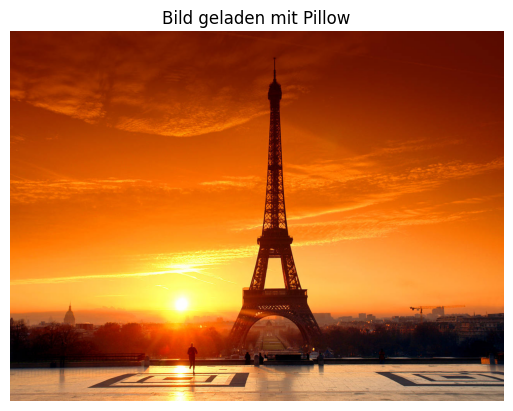

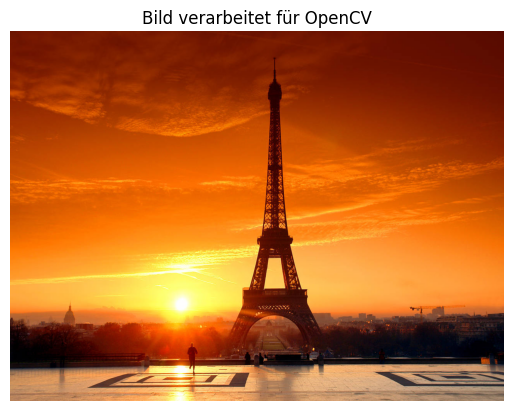

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# URL des Bildes
image_url = "https://www.paris.citysam.de/fotos-paris-i/eiffelturm-und-umgebung/eiffelturm-52.jpg"

# Schritt 1: Bild aus der URL laden
response = requests.get(image_url)
if response.status_code == 200:
    print("Bild erfolgreich geladen!")
    image_bytes = BytesIO(response.content)  # Bildinhalt als BytesIO-Objekt
else:
    raise Exception("Fehler beim Laden des Bildes, HTTP-Status:", response.status_code)

# Schritt 2: Bild mit Pillow anzeigen
image_pillow = Image.open(image_bytes)
plt.imshow(image_pillow)
plt.axis("off")
plt.title("Bild geladen mit Pillow")
plt.show()

# Schritt 3: Konvertierung für OpenCV
# Pillow-zu-NumPy-Array für OpenCV
image_cv = np.array(image_pillow)
# Umwandlung von RGB zu BGR (OpenCV-Standard)
image_cv_bgr = cv2.cvtColor(image_cv, cv2.COLOR_RGB2BGR)

# Anzeige mit OpenCV (optional, für Demonstration hier in Matplotlib):
plt.imshow(cv2.cvtColor(image_cv_bgr, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Bild verarbeitet für OpenCV")
plt.show()

In [ ]:
type(image_pillow)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
type(image_cv)

numpy.ndarray

In [ ]:
image_cv.shape

(959, 1280, 3)

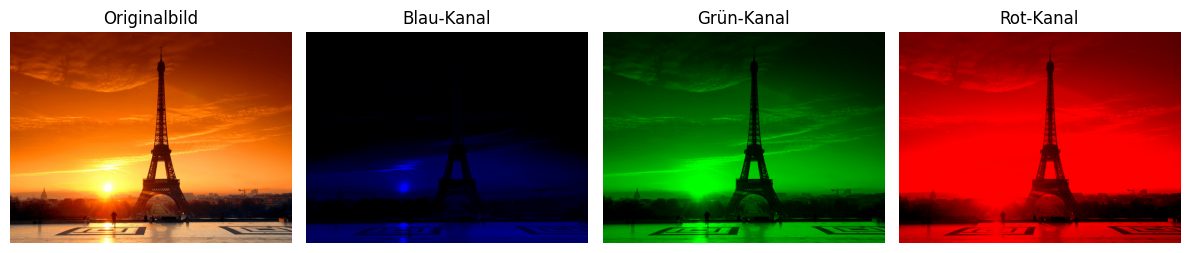

In [ ]:
# Farbkanäle extrahieren (BGR-Format in OpenCV)
blue_channel = image_cv_bgr[:, :, 0]
green_channel = image_cv_bgr[:, :, 1]
red_channel = image_cv_bgr[:, :, 2]

# Erstellen von farbigen Darstellungen für die Kanäle
blue_image = image_cv_bgr.copy()
blue_image[:, :, 1] = 0  # Grün deaktivieren
blue_image[:, :, 2] = 0  # Rot deaktivieren

green_image = image_cv_bgr.copy()
green_image[:, :, 0] = 0  # Blau deaktivieren
green_image[:, :, 2] = 0  # Rot deaktivieren

red_image = image_cv_bgr.copy()
red_image[:, :, 0] = 0  # Blau deaktivieren
red_image[:, :, 1] = 0  # Grün deaktivieren

# Erstellen der Subplots
plt.figure(figsize=(12, 6))  # Fenstergröße anpassen

# Originalbild
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image_cv_bgr, cv2.COLOR_BGR2RGB))
plt.title("Originalbild")
plt.axis("off")

# Blau-Kanal
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(blue_image, cv2.COLOR_BGR2RGB))
plt.title("Blau-Kanal")
plt.axis("off")

# Grün-Kanal
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(green_image, cv2.COLOR_BGR2RGB))
plt.title("Grün-Kanal")
plt.axis("off")

# Rot-Kanal
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(red_image, cv2.COLOR_BGR2RGB))
plt.title("Rot-Kanal")
plt.axis("off")

# Anzeigen der Grafik
plt.tight_layout()
plt.show()

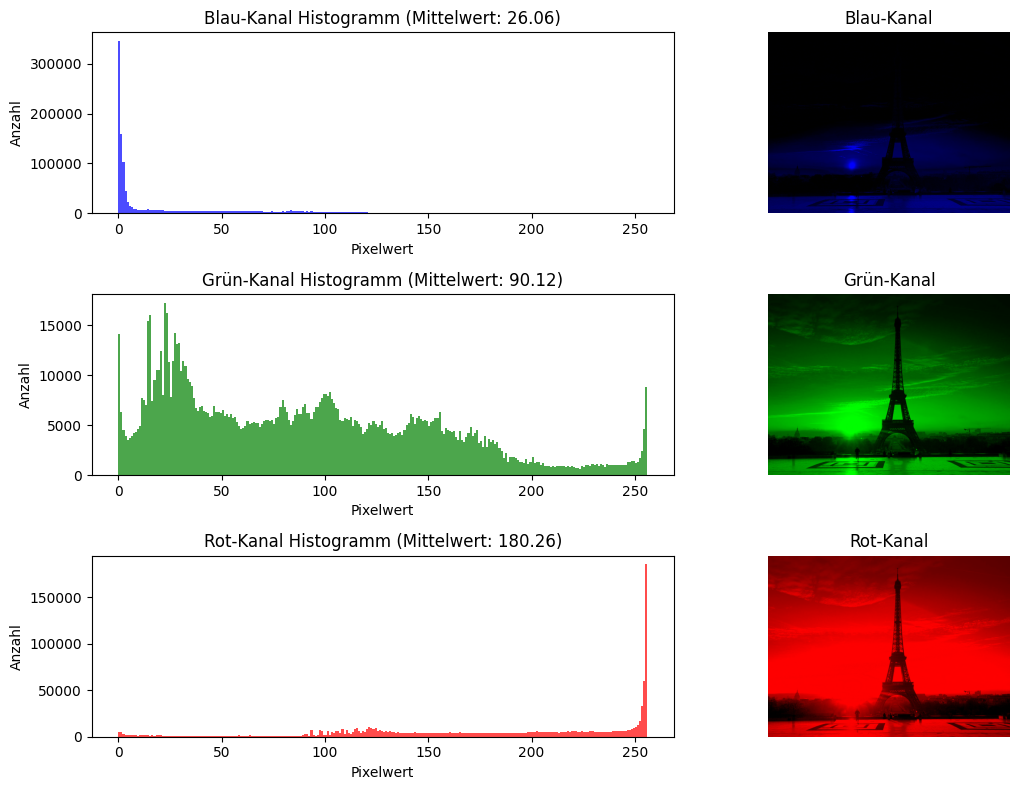

In [ ]:
# Durchschnittswerte der Farbkanäle berechnen
blue_mean = blue_channel.mean()
green_mean = green_channel.mean()
red_mean = red_channel.mean()

# Histogramme erstellen
plt.figure(figsize=(12, 8))

# Blau-Kanal Histogramm
plt.subplot(3, 2, 1)
plt.hist(blue_channel.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title(f"Blau-Kanal Histogramm (Mittelwert: {blue_mean:.2f})")
plt.xlabel("Pixelwert")
plt.ylabel("Anzahl")

# Blau-Kanal Bild
plt.subplot(3, 2, 2)
plt.imshow(cv2.cvtColor(blue_image, cv2.COLOR_BGR2RGB))
plt.title("Blau-Kanal")
plt.axis("off")

# Grün-Kanal Histogramm
plt.subplot(3, 2, 3)
plt.hist(green_channel.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)
plt.title(f"Grün-Kanal Histogramm (Mittelwert: {green_mean:.2f})")
plt.xlabel("Pixelwert")
plt.ylabel("Anzahl")

# Grün-Kanal Bild
plt.subplot(3, 2, 4)
plt.imshow(cv2.cvtColor(green_image, cv2.COLOR_BGR2RGB))
plt.title("Grün-Kanal")
plt.axis("off")

# Rot-Kanal Histogramm
plt.subplot(3, 2, 5)
plt.hist(red_channel.ravel(), bins=256, range=(0, 256), color='red', alpha=0.7)
plt.title(f"Rot-Kanal Histogramm (Mittelwert: {red_mean:.2f})")
plt.xlabel("Pixelwert")
plt.ylabel("Anzahl")

# Rot-Kanal Bild
plt.subplot(3, 2, 6)
plt.imshow(cv2.cvtColor(red_image, cv2.COLOR_BGR2RGB))
plt.title("Rot-Kanal")
plt.axis("off")

plt.tight_layout()
plt.show()

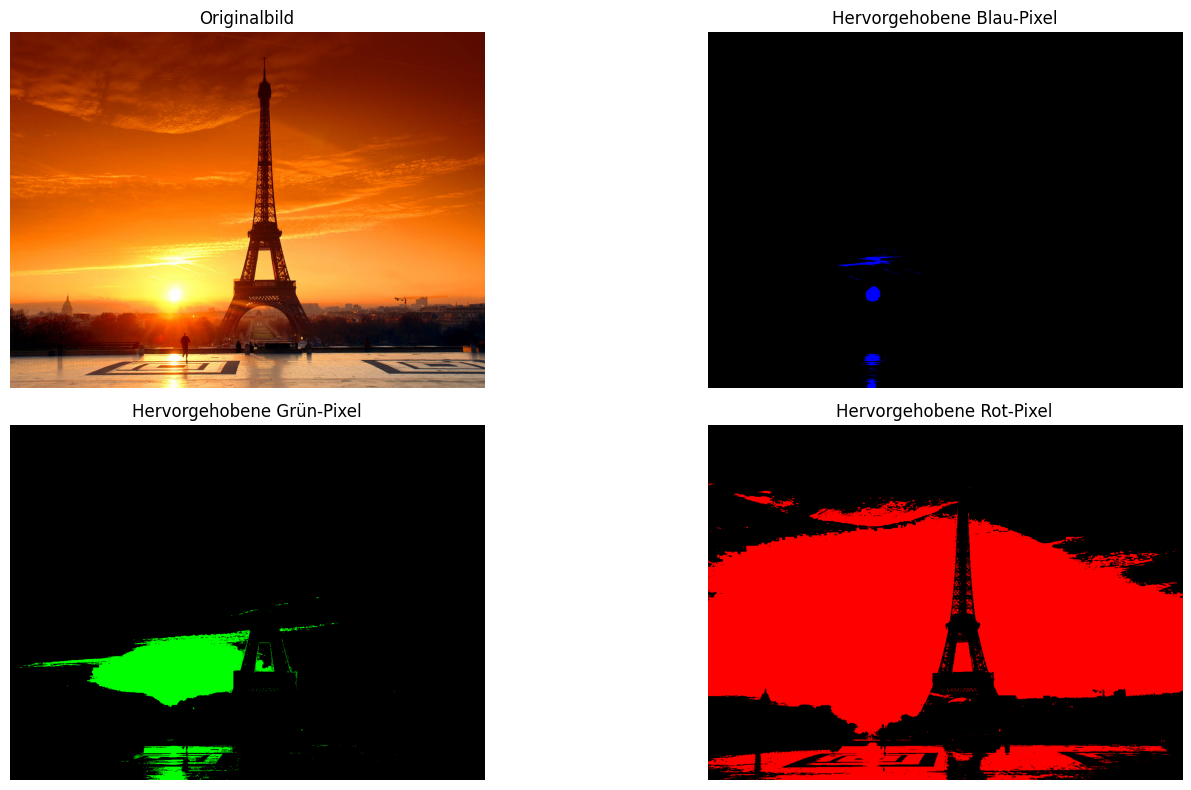

In [ ]:
# Eine Kopie des Originals erstellen, um die hervorgehobenen Pixel zu visualisieren
highlight_blue = np.zeros_like(image_cv_bgr)
highlight_green = np.zeros_like(image_cv_bgr)
highlight_red = np.zeros_like(image_cv_bgr)

# Schwellenwert festlegen, um die "stärksten" Farbanteile zu definieren
threshold = 200  # Pixelwerte über diesem Schwellenwert werden hervorgehoben

# Pixel mit starken Blau-Anteilen markieren
highlight_blue[image_cv_bgr[:, :, 0] > threshold] = [255, 0, 0]  # Blau markieren

# Pixel mit starken Grün-Anteilen markieren
highlight_green[image_cv_bgr[:, :, 1] > threshold] = [0, 255, 0]  # Grün markieren

# Pixel mit starken Rot-Anteilen markieren
highlight_red[image_cv_bgr[:, :, 2] > threshold] = [0, 0, 255]  # Rot markieren

# Plotten der hervorgehobenen Kanäle
plt.figure(figsize=(16, 8))

# Originalbild
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image_cv_bgr, cv2.COLOR_BGR2RGB))
plt.title("Originalbild")
plt.axis("off")

# Hervorgehobene Blau-Pixel
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(highlight_blue, cv2.COLOR_BGR2RGB))
plt.title("Hervorgehobene Blau-Pixel")
plt.axis("off")

# Hervorgehobene Grün-Pixel
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(highlight_green, cv2.COLOR_BGR2RGB))
plt.title("Hervorgehobene Grün-Pixel")
plt.axis("off")

# Hervorgehobene Rot-Pixel
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(highlight_red, cv2.COLOR_BGR2RGB))
plt.title("Hervorgehobene Rot-Pixel")
plt.axis("off")

plt.tight_layout()
plt.show()

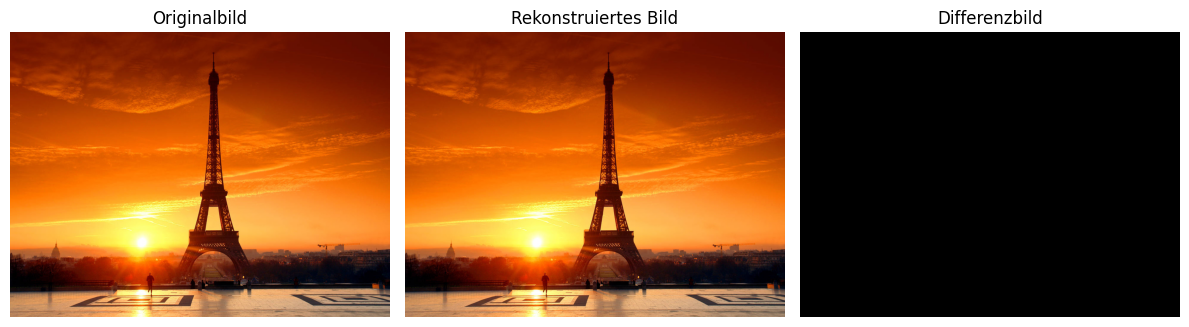

In [ ]:
# Farbkanäle zu einem Bild kombinieren
# Alle Kanäle zusammenfügen
reconstructed_image = np.stack((blue_channel, green_channel, red_channel), axis=-1)

# Plotten der Ergebnisse
plt.figure(figsize=(12, 6))

# Originalbild
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_cv_bgr, cv2.COLOR_BGR2RGB))
plt.title("Originalbild")
plt.axis("off")

# Rekonstruiertes Bild (BGR)
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
plt.title("Rekonstruiertes Bild")
plt.axis("off")

# Differenzbild zwischen Original und Rekonstruktion
difference = cv2.absdiff(image_cv_bgr, reconstructed_image)
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(difference, cv2.COLOR_BGR2RGB))
plt.title("Differenzbild")
plt.axis("off")

plt.tight_layout()
plt.show()

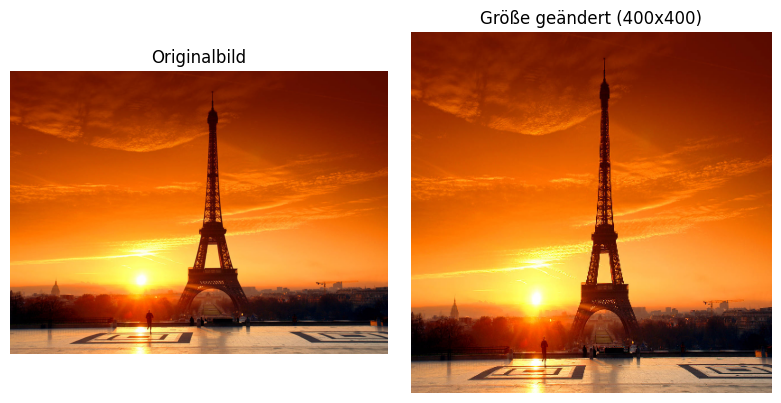

In [ ]:
# Bildgröße ändern
resized_image = cv2.resize(image_cv_bgr, (400, 400))  # Größe auf 400x400 setzen

# Plotten
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_cv_bgr, cv2.COLOR_BGR2RGB))
plt.title("Originalbild")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title("Größe geändert (400x400)")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
(image_cv_bgr.shape, resized_image.shape)

((959, 1280, 3), (400, 400, 3))

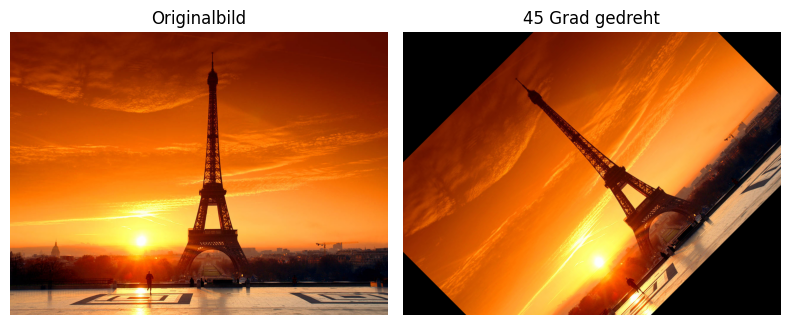

In [ ]:
# Bild um 45 Grad drehen
(h, w) = image_cv_bgr.shape[:2]  # Höhe und Breite des Bildes
center = (w // 2, h // 2)  # Zentrum des Bildes

# Rotationsmatrix erstellen
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)  # (Zentrum, Winkel, Skalierung)
rotated_image = cv2.warpAffine(image_cv_bgr, rotation_matrix, (w, h))

# Plotten
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_cv_bgr, cv2.COLOR_BGR2RGB))
plt.title("Originalbild")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("45 Grad gedreht")
plt.axis("off")

plt.tight_layout()
plt.show()

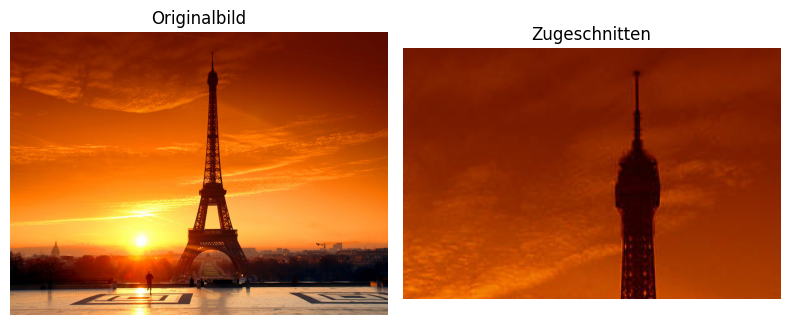

In [ ]:
# Ausschnitt des Bildes
cropped_image = image_cv_bgr[50:250, 500:800]  # [Höhe (y1:y2), Breite (x1:x2)]

# Plotten
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_cv_bgr, cv2.COLOR_BGR2RGB))
plt.title("Originalbild")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title("Zugeschnitten")
plt.axis("off")

plt.tight_layout()
plt.show()

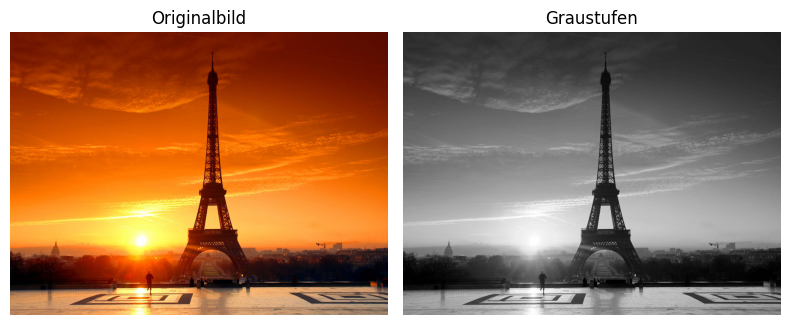

In [ ]:
# Umwandlung in Graustufen
gray_image = cv2.cvtColor(image_cv_bgr, cv2.COLOR_BGR2GRAY)

# Plotten
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_cv_bgr, cv2.COLOR_BGR2RGB))
plt.title("Originalbild")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap="gray")
plt.title("Graustufen")
plt.axis("off")

plt.tight_layout()
plt.show()

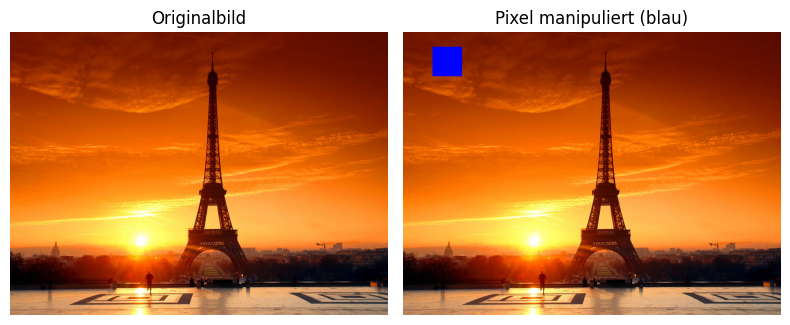

In [ ]:
# Bereich des Bildes rot einfärben
manipulated_image = image_cv_bgr.copy()
manipulated_image[50:150, 100:200] = [255, 0, 0]  # BGR: Blau

# Plotten
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_cv_bgr, cv2.COLOR_BGR2RGB))
plt.title("Originalbild")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(manipulated_image, cv2.COLOR_BGR2RGB))
plt.title("Pixel manipuliert (blau)")
plt.axis("off")

plt.tight_layout()
plt.show()

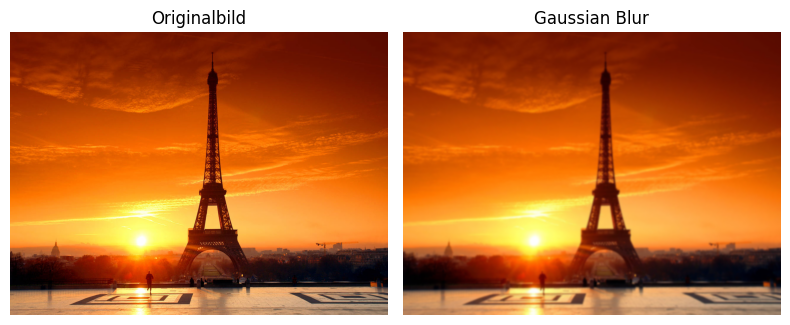

In [ ]:
# Gaussian Blur
blurred_image = cv2.GaussianBlur(image_cv_bgr, (15, 15), 0)

# Plotten
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_cv_bgr, cv2.COLOR_BGR2RGB))
plt.title("Originalbild")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis("off")

plt.tight_layout()
plt.show()

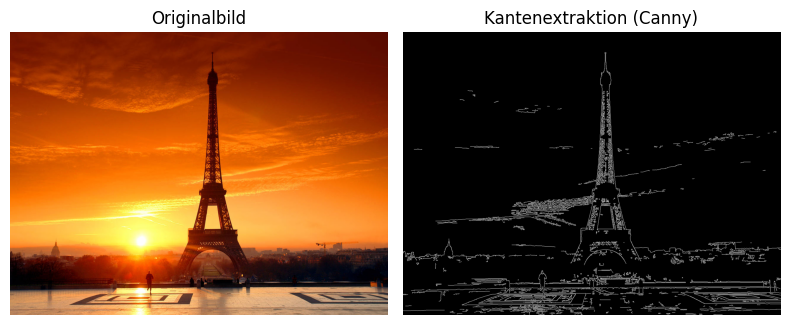

In [ ]:
# Kantenextraktion mit Canny
edges = cv2.Canny(image_cv_bgr, 100, 200)

# Plotten
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_cv_bgr, cv2.COLOR_BGR2RGB))
plt.title("Originalbild")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Kantenextraktion (Canny)")
plt.axis("off")

plt.tight_layout()
plt.show()

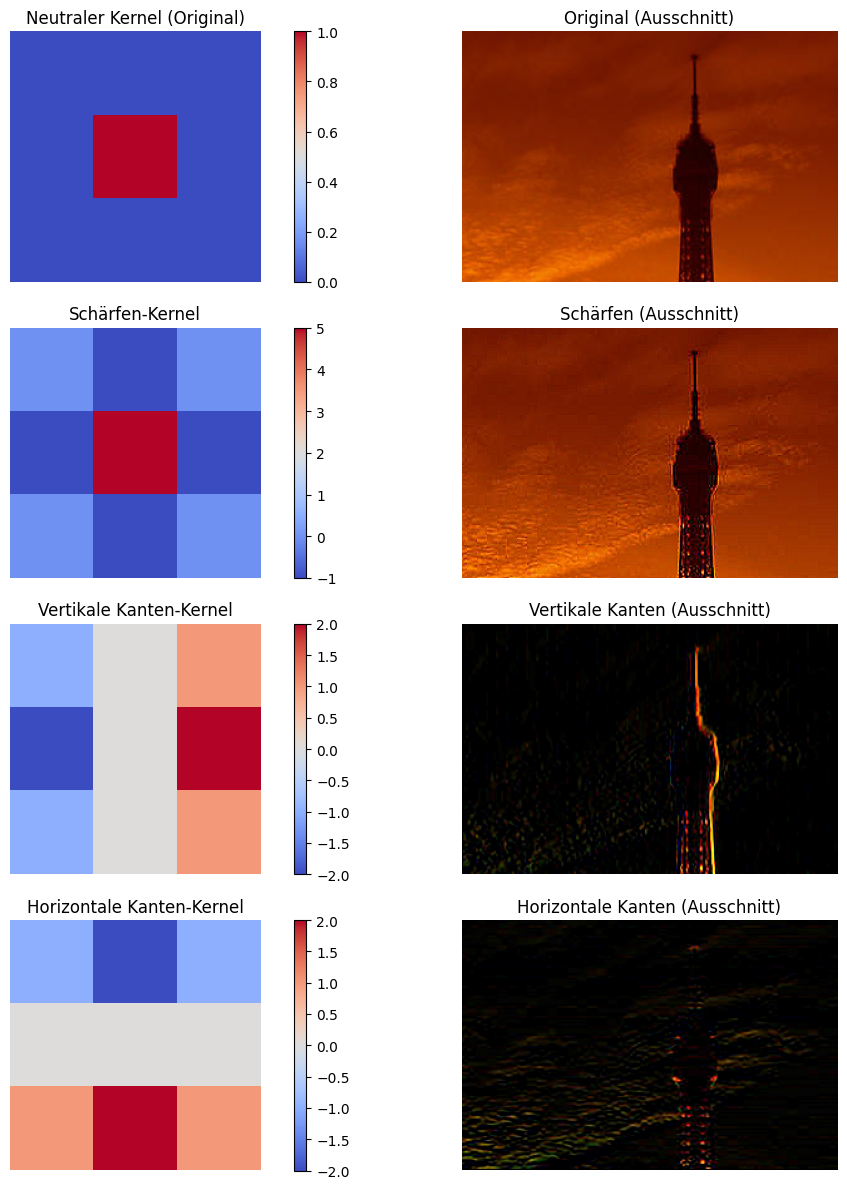

In [ ]:
# Einen Ausschnitt aus dem Originalbild auswählen
cropped_image = image_cv_bgr[50:250, 500:800]  # [y1:y2, x1:x2]

# Kernel definieren
kernel_identity = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])  # Neutraler Kernel

kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

kernel_edge_vertical = np.array([[-1, 0, 1],
                                  [-2, 0, 2],
                                  [-1, 0, 1]])

kernel_edge_horizontal = np.array([[-1, -2, -1],
                                    [ 0,  0,  0],
                                    [ 1,  2,  1]])

# Filter auf den Ausschnitt anwenden
image_original = cv2.filter2D(cropped_image, -1, kernel_identity)  # Keine Veränderung
image_sharpen = cv2.filter2D(cropped_image, -1, kernel_sharpen)
image_edge_vertical = cv2.filter2D(cropped_image, -1, kernel_edge_vertical)
image_edge_horizontal = cv2.filter2D(cropped_image, -1, kernel_edge_horizontal)

# Plotten der Kernel und ihrer Ergebnisse
plt.figure(figsize=(16, 12))

# Kernel für Originalbild
plt.subplot(4, 2, 1)
plt.imshow(kernel_identity, cmap="coolwarm", interpolation="nearest")
plt.title("Neutraler Kernel (Original)")
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis("off")

# Originalbild (Ausschnitt)
plt.subplot(4, 2, 2)
plt.imshow(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))
plt.title("Original (Ausschnitt)")
plt.axis("off")

# Kernel für Schärfen
plt.subplot(4, 2, 3)
plt.imshow(kernel_sharpen, cmap="coolwarm", interpolation="nearest")
plt.title("Schärfen-Kernel")
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis("off")

# Schärfen-Ergebnis
plt.subplot(4, 2, 4)
plt.imshow(cv2.cvtColor(image_sharpen, cv2.COLOR_BGR2RGB))
plt.title("Schärfen (Ausschnitt)")
plt.axis("off")

# Kernel für vertikale Kanten
plt.subplot(4, 2, 5)
plt.imshow(kernel_edge_vertical, cmap="coolwarm", interpolation="nearest")
plt.title("Vertikale Kanten-Kernel")
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis("off")

# Vertikale Kanten-Ergebnis
plt.subplot(4, 2, 6)
plt.imshow(cv2.cvtColor(image_edge_vertical, cv2.COLOR_BGR2RGB))
plt.title("Vertikale Kanten (Ausschnitt)")
plt.axis("off")

# Kernel für horizontale Kanten
plt.subplot(4, 2, 7)
plt.imshow(kernel_edge_horizontal, cmap="coolwarm", interpolation="nearest")
plt.title("Horizontale Kanten-Kernel")
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis("off")

# Horizontale Kanten-Ergebnis
plt.subplot(4, 2, 8)
plt.imshow(cv2.cvtColor(image_edge_horizontal, cv2.COLOR_BGR2RGB))
plt.title("Horizontale Kanten (Ausschnitt)")
plt.axis("off")

plt.tight_layout()
plt.show()

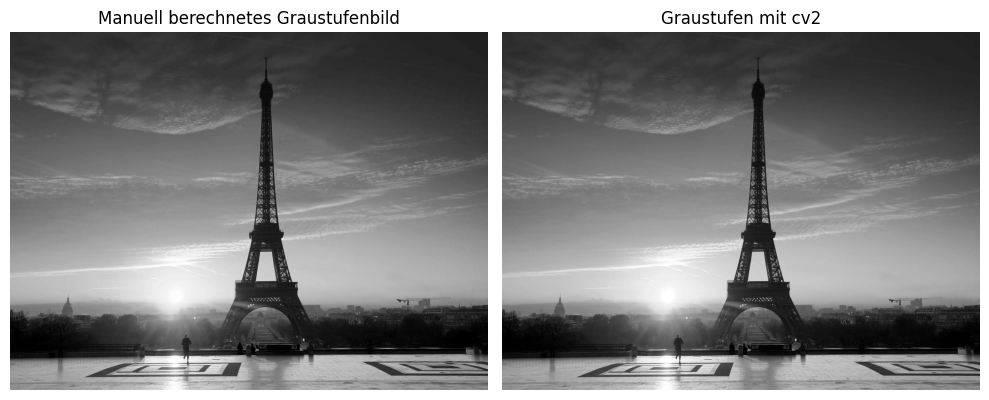

In [ ]:
# Funktion zur manuellen Umwandlung eines Bildes in Graustufen
def manual_grayscale(image):
    # Extrahiere die Farbkanäle (B, G, R) aus dem Bild.
    # OpenCV speichert die Kanäle in der Reihenfolge B (Blau), G (Grün), R (Rot).
    # Daher splitten wir das Bild in diese drei separaten Kanäle.
    b, g, r = image[:, :, 0], image[:, :, 1], image[:, :, 2]

    # Manuelle Berechnung der Graustufenwerte:
    # Jeder Farbkanal trägt unterschiedlich zur Helligkeit bei, da das menschliche Auge
    # verschiedene Empfindlichkeiten für Farben hat:
    # - Rot: 29.9% Einfluss
    # - Grün: 58.7% Einfluss (dominant, da das Auge für Grün am empfindlichsten ist)
    # - Blau: 11.4% Einfluss
    # Die Gewichtungen stammen aus der internationalen Norm ITU-R BT.601.
    # Das Ergebnis ist ein gewichteter Durchschnitt der Farbkanäle.
    gray = 0.299 * r + 0.587 * g + 0.114 * b

    # Die berechneten Werte könnten Dezimalzahlen enthalten (Floating-Point).
    # Daher werden die Werte in Ganzzahlen (8-Bit: 0 bis 255) umgewandelt.
    return gray.astype(np.uint8)

# Plotten
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(manual_gray, cmap="gray")
plt.title("Manuell berechnetes Graustufenbild")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv_gray, cmap="gray")
plt.title("Graustufen mit cv2")
plt.axis("off")

plt.tight_layout()
plt.show()

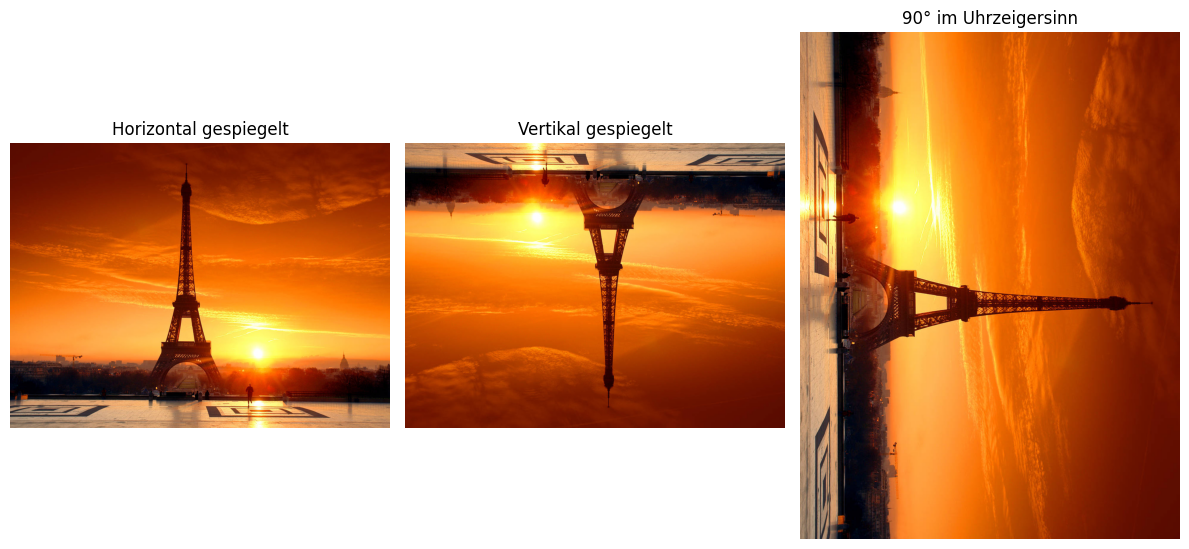

In [ ]:
# Horizontal spiegeln
# Die Notation image[:, ::-1] bedeutet:
# - Der erste Doppelpunkt (:) lässt alle Zeilen (Höhe) unverändert.
# - Der zweite Parameter (::-1) kehrt die Spalten (Breite) um.
# - Dadurch werden alle Pixel in jeder Zeile horizontal gespiegelt.
horizontal_flip = image_cv_bgr[:, ::-1]

# Vertikal spiegeln
# Die Notation image[::-1, :] bedeutet:
# - Der erste Parameter (::-1) kehrt die Zeilen (Höhe) um.
# - Der zweite Doppelpunkt (:) lässt die Spalten (Breite) unverändert.
# - Dadurch werden alle Pixel in jeder Spalte vertikal gespiegelt.
vertical_flip = image_cv_bgr[::-1, :]

# 90°-Rotation (im Uhrzeigersinn)
# Zuerst wird die Transposition des Bildes durchgeführt: np.transpose(image, (1, 0, 2))
# - (1, 0, 2) bedeutet:
#   - Achse 0 (Höhe) wird mit Achse 1 (Breite) vertauscht.
#   - Achse 2 (Farbkanäle: BGR) bleibt unverändert.
# - Dadurch wird das Bild um 90° gegen den Uhrzeigersinn gedreht.
# Anschließend wird [:, ::-1] verwendet, um die Spalten der transponierten Version horizontal zu spiegeln.
# - Dies dreht das Bild effektiv um 90° im Uhrzeigersinn.
rotated_90 = np.transpose(image_cv_bgr, (1, 0, 2))[:, ::-1]

# Plotten
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(horizontal_flip, cv2.COLOR_BGR2RGB))
plt.title("Horizontal gespiegelt")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(vertical_flip, cv2.COLOR_BGR2RGB))
plt.title("Vertikal gespiegelt")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(rotated_90, cv2.COLOR_BGR2RGB))
plt.title("90° im Uhrzeigersinn")
plt.axis("off")

plt.tight_layout()
plt.show()

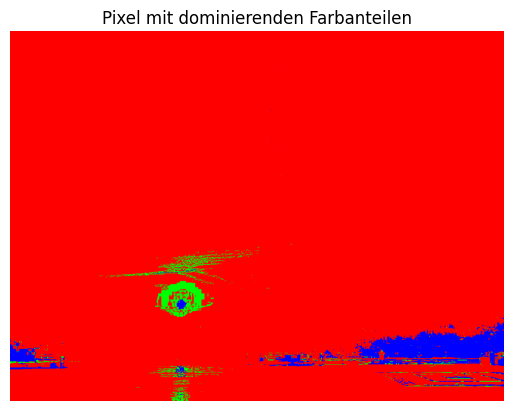

In [ ]:
# Dominierende Farbe bestimmen
# np.argmax(image_cv_bgr, axis=2) berechnet die Indizes der maximalen Werte entlang der dritten Achse (Farbkanäle: B, G, R).
# - axis=2 gibt an, dass wir die maximale Farbe für jeden Pixel über die Farbkanäle ermitteln.
# - Der Rückgabewert ist ein 2D-Array (Höhe x Breite), das für jeden Pixel einen Wert von 0, 1 oder 2 enthält:
#   - 0: Blau (B-Kanal ist dominant)
#   - 1: Grün (G-Kanal ist dominant)
#   - 2: Rot (R-Kanal ist dominant)
dominant_color = np.argmax(image_cv_bgr, axis=2)

# Maske für jede Farbe erstellen
# highlight_image ist ein leeres Bild, das die dominierenden Farben hervorheben wird.
# np.zeros_like(image_cv_bgr) erzeugt ein Array der gleichen Größe wie das Originalbild, initialisiert mit Nullen (schwarz).
highlight_image = np.zeros_like(image_cv_bgr)

# Highlight für dominante blaue Pixel
# highlight_image[dominant_color == 0] wählt alle Pixel aus, bei denen Blau die dominante Farbe ist.
# Diese Pixel werden auf [255, 0, 0] gesetzt (reines Blau).
highlight_image[dominant_color == 0] = [255, 0, 0]

# Highlight für dominante grüne Pixel
# highlight_image[dominant_color == 1] wählt alle Pixel aus, bei denen Grün die dominante Farbe ist.
# Diese Pixel werden auf [0, 255, 0] gesetzt (reines Grün).
highlight_image[dominant_color == 1] = [0, 255, 0]

# Highlight für dominante rote Pixel
# highlight_image[dominant_color == 2] wählt alle Pixel aus, bei denen Rot die dominante Farbe ist.
# Diese Pixel werden auf [0, 0, 255] gesetzt (reines Rot).
highlight_image[dominant_color == 2] = [0, 0, 255]

# Plotten
plt.imshow(cv2.cvtColor(highlight_image, cv2.COLOR_BGR2RGB))
plt.title("Pixel mit dominierenden Farbanteilen")
plt.axis("off")
plt.show()

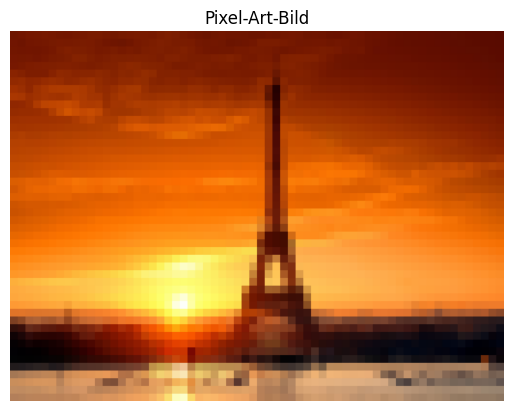

In [ ]:
# Definiere die Kachelgröße
# Jede Kachel ist ein Quadrat der Größe `tile_size x tile_size`.
# Die Bilddimensionen (Höhe und Breite) werden aus dem Originalbild extrahiert.
tile_size = 20
h, w = image_cv_bgr.shape[:2]  # Höhe (h) und Breite (w) des Bildes

# Erstelle eine Kopie des Bildes, um die Pixel-Kunst darauf anzuwenden
image_pixel_art = image_cv_bgr.copy()

# Durchlaufe das Bild kachelweise
# Mit zwei verschachtelten Schleifen iterieren wir durch das Bild:
# - Äußere Schleife: Iteriert über die Zeilen (Höhe) in Schritten von `tile_size`.
# - Innere Schleife: Iteriert über die Spalten (Breite) in Schritten von `tile_size`.
for i in range(0, h, tile_size):  # Zeilenweise durchlaufen
    for j in range(0, w, tile_size):  # Spaltenweise durchlaufen
        # Region of Interest (ROI) definieren:
        # - Jede Kachel wird durch ihren Startpunkt (i, j) und die Größe `tile_size` definiert.
        # - Falls die Kachel am Rand übersteht, passt `roi` automatisch die Größe an.
        roi = image_pixel_art[i:i+tile_size, j:j+tile_size]

        # Berechne die Durchschnittsfarbe der Kachel
        # - `roi.mean(axis=(0, 1))` berechnet den Durchschnittswert für jeden Kanal (B, G, R).
        # - `axis=(0, 1)` bedeutet, dass wir über Höhe und Breite der Kachel mitteln.
        avg_color = roi.mean(axis=(0, 1))

        # Setze alle Pixel in der Kachel auf die Durchschnittsfarbe
        # - `roi[:] = avg_color` weist jedem Pixel der Kachel die berechnete Durchschnittsfarbe zu.
        roi[:] = avg_color

# Ergebnisse anzeigen
plt.imshow(cv2.cvtColor(image_pixel_art.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title("Pixel-Art-Bild")
plt.axis("off")
plt.show()

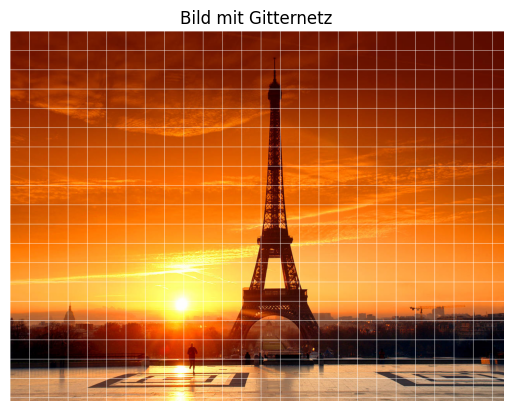

In [ ]:
# Definiere die Gittergröße
# `grid_size` gibt die Größe der Gitterzellen in Pixeln an.
# Beispiel: Wenn `grid_size = 50`, hat jede Zelle eine Breite und Höhe von 50 Pixel.
grid_size = 50

# Erstelle eine Kopie des Originalbilds
# Dies verhindert, dass das Originalbild überschrieben wird.
grid_image = image_cv_bgr.copy()

# Dimensionen des Bildes abrufen
# `rows` ist die Höhe des Bildes (in Pixeln).
# `cols` ist die Breite des Bildes (in Pixeln).
rows, cols = grid_image.shape[:2]

# Vertikale Gitterlinien zeichnen
# Iteriere über die Breite des Bildes in Schritten von `grid_size`.
for x in range(0, cols, grid_size):
    # Zeichne eine vertikale Linie von (x, 0) (oben) bis (x, rows) (unten).
    # Die Linie ist weiß (255, 255, 255) und hat eine Dicke von 1 Pixel.
    cv2.line(grid_image, (x, 0), (x, rows), (255, 255, 255), 1)

# Horizontale Gitterlinien zeichnen
# Iteriere über die Höhe des Bildes in Schritten von `grid_size`.
for y in range(0, rows, grid_size):
    # Zeichne eine horizontale Linie von (0, y) (links) bis (cols, y) (rechts).
    # Die Linie ist ebenfalls weiß (255, 255, 255) und hat eine Dicke von 1 Pixel.
    cv2.line(grid_image, (0, y), (cols, y), (255, 255, 255), 1)

# Ergebnisse anzeigen
plt.imshow(cv2.cvtColor(grid_image, cv2.COLOR_BGR2RGB))
plt.title("Bild mit Gitternetz")
plt.axis("off")
plt.show()

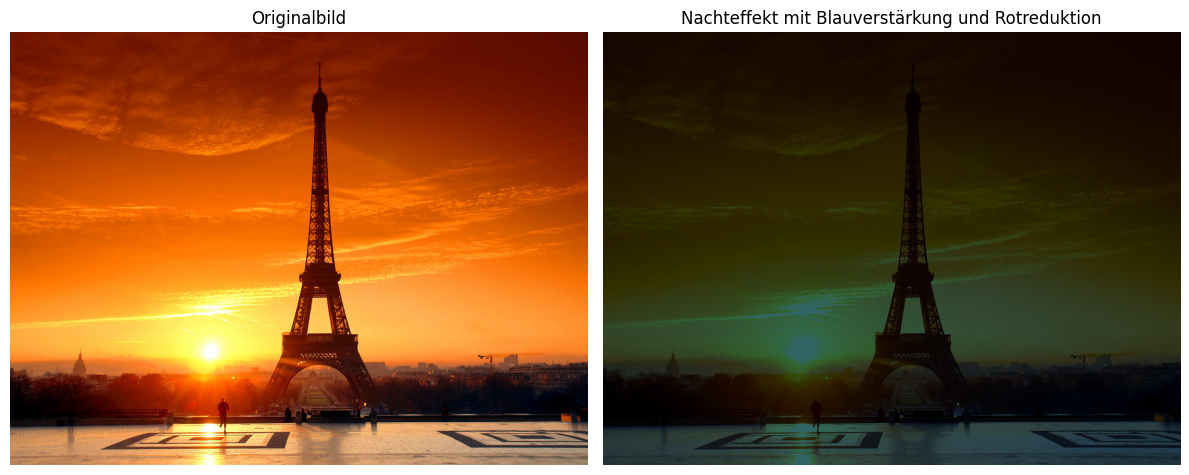

In [ ]:
# Eine Kopie des Bildes erstellen, um den Nachteffekt anzuwenden
# - Wir verwenden `.astype(np.float32)`, um mit Gleitkommazahlen zu arbeiten.
# - Dadurch können wir die Intensitäten präzise skalieren, ohne Werte zu verlieren.
night_effect = image_cv_bgr.copy().astype(np.float32)

# Blau verstärken
# - Der Blaue Kanal ist der erste Kanal (Index 0) im BGR-Format von OpenCV.
# - Wir multiplizieren alle Pixel im blauen Kanal mit 1.5, um sie zu verstärken.
# - Die Funktion `np.minimum` begrenzt die Werte auf maximal 255, damit sie im gültigen Bereich bleiben.
night_effect[:, :, 0] = np.minimum(night_effect[:, :, 0] * 1.5, 255)

# Rot reduzieren
# - Der Rote Kanal ist der dritte Kanal (Index 2).
# - Wir multiplizieren alle Pixel im roten Kanal mit 0.5, um sie abzuschwächen.
night_effect[:, :, 2] = night_effect[:, :, 2] * 0.5

# Bild abdunkeln
# - Um den Nachteffekt zu verstärken, wird die Helligkeit des gesamten Bildes reduziert.
# - Wir multiplizieren alle Farbkanäle mit 0.4, was das Bild dunkler macht.
# - Dadurch wirkt der Blaukanal noch dominanter.
night_effect *= 0.4

# Konvertierung zurück zu Ganzzahlen
# - Nachdem wir die Intensitäten skaliert haben, konvertieren wir das Bild zurück zu `np.uint8`,
#   da dies das Standardformat für Bilder in OpenCV ist.
night_effect = night_effect.astype(np.uint8)

# Ergebnisse anzeigen
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_cv_bgr, cv2.COLOR_BGR2RGB))
plt.title("Originalbild")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(night_effect, cv2.COLOR_BGR2RGB))
plt.title("Nachteffekt mit Blauverstärkung und Rotreduktion")
plt.axis("off")

plt.tight_layout()
plt.show()

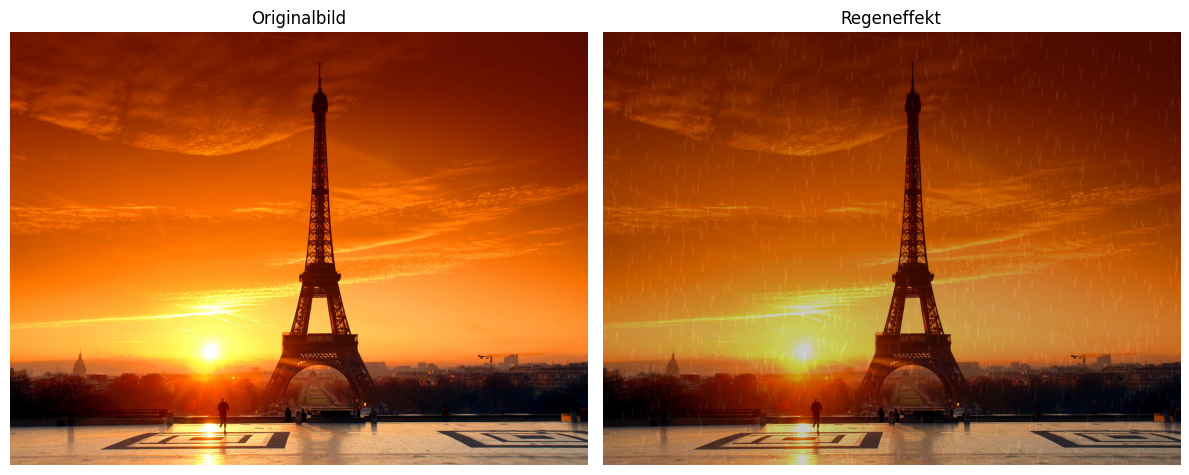

In [ ]:
# Dimensionen des Bildes
# `h` ist die Höhe und `w` die Breite des Bildes in Pixeln.
h, w = image_cv_bgr.shape[:2]

# Erzeuge eine leere Leinwand für den Regen
# `rain` ist ein schwarzes Bild der gleichen Größe wie das Originalbild.
# Es dient als Basis, um die Regenlinien zu zeichnen.
rain = np.zeros_like(image_cv_bgr, dtype=np.uint8)

# Anzahl der Regentropfen
# `num_drops` gibt an, wie viele Regenlinien gezeichnet werden sollen.
num_drops = 1000

# Regenlinien zeichnen
# Die Schleife iteriert über die Anzahl der Regentropfen.
for _ in range(num_drops):
    # Startpunkt des Regentropfens (x1, y1)
    x1, y1 = np.random.randint(0, w), np.random.randint(0, h)

    # Endpunkt des Regentropfens (x2, y2)
    # - x2 ist leicht versetzt zu x1 (innerhalb von ±5 Pixeln), um diagonale Linien zu erzeugen.
    # - y2 ist nach unten verlängert (15–25 Pixel), um die Länge des Tropfens zu simulieren.
    x2, y2 = x1 + np.random.randint(-5, 5), y1 + np.random.randint(15, 25)

    # Zeichne die Linie (Regentropfen) auf das schwarze Bild
    # - cv2.line zeichnet eine Linie von (x1, y1) nach (x2, y2).
    # - Die Farbe ist grau: (200, 200, 200) im BGR-Format.
    # - Die Linienbreite beträgt 1 Pixel.
    cv2.line(rain, (x1, y1), (x2, y2), (200, 200, 200), 1)

# Unschärfe auf den Regen anwenden
# cv2.GaussianBlur erzeugt eine leichte Unschärfe, um die Linien weicher wirken zu lassen.
# - Der Kernel (5, 5) bestimmt den Bereich der Unschärfe.
# - `0` ist die Standardabweichung für die Gaußsche Verteilung.
rain_blur = cv2.GaussianBlur(rain, (5, 5), 0)

# Regen mit dem Originalbild kombinieren
# cv2.addWeighted mischt zwei Bilder mit einem gewichteten Durchschnitt:
# - `image_cv_bgr` ist das Originalbild, das 80% Gewicht erhält.
# - `rain_blur` ist das unscharfe Regenbild, das 20% Gewicht erhält.
# - `0` ist der Skalierungsfaktor, der die Summe nicht beeinflusst.
rainy_image = cv2.addWeighted(image_cv_bgr, 0.8, rain_blur, 0.2, 0)

# Ergebnisse anzeigen
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_cv_bgr, cv2.COLOR_BGR2RGB))
plt.title("Originalbild")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rainy_image, cv2.COLOR_BGR2RGB))
plt.title("Regeneffekt")
plt.axis("off")

plt.tight_layout()
plt.show()

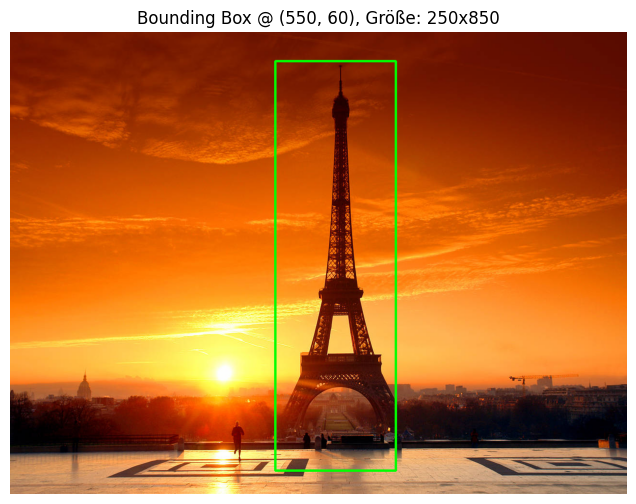

In [ ]:
# Originalbild kopieren
# Erstelle eine Kopie des Originalbildes, damit das Original unverändert bleibt.
image_copy = image_cv_bgr.copy()

# Manuelle Bounding Box-Parameter definieren
# - box_x, box_y: Anfangskoordinaten der Bounding Box (oben links).
# - box_width, box_height: Breite und Höhe der Box in Pixeln.
# - box_color: Farbe der Bounding Box im BGR-Format. (0, 255, 0) bedeutet Grün.
# - box_thickness: Dicke der Linien, die die Box zeichnen.
box_x, box_y = 550, 60  # X- und Y-Koordinaten der oberen linken Ecke
box_width, box_height = 250, 850  # Breite und Höhe der Bounding Box
box_color = (0, 255, 0)  # Grüne Box (BGR-Format)
box_thickness = 3  # Linienbreite der Box

# Funktion zum Zeichnen der Bounding Box
# - cv2.rectangle zeichnet ein Rechteck auf das Bild.
# - Parameter:
#   - image: Das Bild, auf dem die Box gezeichnet wird.
#   - (x, y): Die obere linke Ecke des Rechtecks.
#   - (x + width, y + height): Die untere rechte Ecke des Rechtecks.
#   - color: Die Farbe des Rechtecks im BGR-Format.
#   - thickness: Die Linienbreite des Rechtecks. Falls -1 angegeben wird, wird die Box gefüllt.
def draw_bounding_box(image, x, y, width, height, color, thickness):
    cv2.rectangle(image, (x, y), (x + width, y + height), color, thickness)
    return image

# Manuelle Bounding Box anwenden
# Rufe die Funktion `draw_bounding_box` mit den definierten Parametern auf.
# - `image_copy` ist das Bild, auf das die Box gezeichnet wird.
# - Die Bounding Box wird anhand der Position (box_x, box_y) und der Größe (box_width, box_height) gezeichnet.
updated_image = draw_bounding_box(image_copy, box_x, box_y, box_width, box_height, box_color, box_thickness)

# Ergebnisse anzeigen
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(updated_image, cv2.COLOR_BGR2RGB))
plt.title(f"Bounding Box @ ({box_x}, {box_y}), Größe: {box_width}x{box_height}")
plt.axis("off")
plt.show()

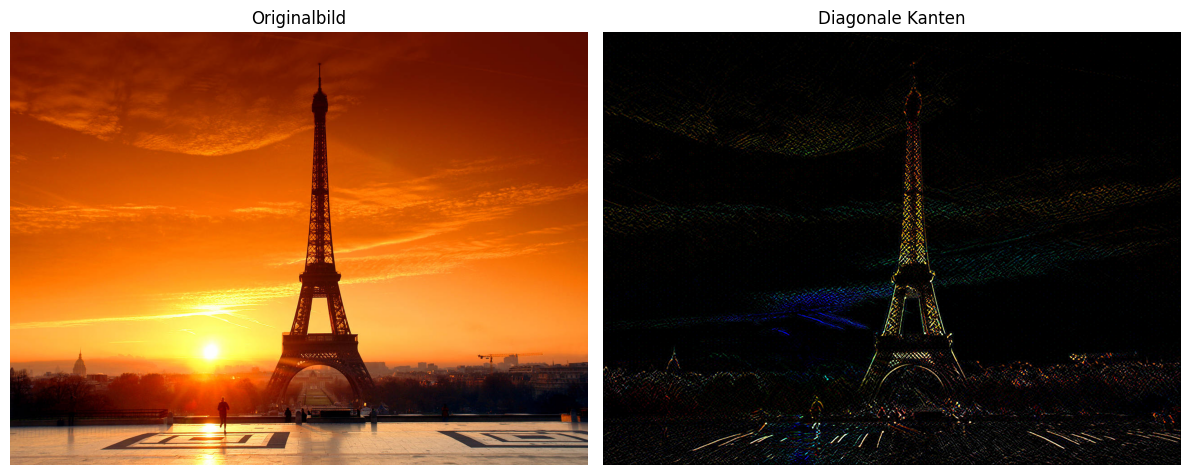

In [ ]:
# Eigenes Diagonal-Kanten-Kernel definieren
# Dies ist eine 5x5-Matrix, die verwendet wird, um diagonale Kanten im Bild hervorzuheben.
# Die Werte des Kernels:
# - Positive Werte (z. B. 2) betonen helle Bereiche entlang bestimmter Kantenrichtungen.
# - Negative Werte (-2) betonen dunkle Bereiche entlang der gegenüberliegenden Richtung.
# - Nullwerte ignorieren die entsprechenden Pixel.
kernel_diagonal_edges = np.array([
    [ 2,  0,  0,  0, -2],  # Stark gewichtete diagonale Ecken (oben links und unten rechts)
    [ 0,  1,  0, -1,  0],  # Schwächere Gewichtung entlang der Hauptdiagonalen
    [ 0,  0,  0,  0,  0],  # Nullwerte in der Mitte ignorieren den zentralen Bereich
    [ 0, -1,  0,  1,  0],  # Schwächere Gewichtung entlang der Nebenachse
    [-2,  0,  0,  0,  2]   # Stark gewichtete diagonale Ecken (oben rechts und unten links)
])

# Filter anwenden
# cv2.filter2D wendet das Kernel auf das Bild an:
# - image_cv_bgr: Das Eingabebild im BGR-Format.
# - -1: Tiefenparameter, der angibt, dass die Ausgabe die gleiche Bit-Tiefe wie die Eingabe haben soll.
# - kernel_diagonal_edges: Das definierte Kernel zur Erkennung von diagonalen Kanten.
# Ergebnis:
# - `diagonal_edges` ist ein Bild, in dem diagonale Kanten hervorgehoben werden.
diagonal_edges = cv2.filter2D(image_cv_bgr, -1, kernel_diagonal_edges)

# Plotten
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_cv_bgr, cv2.COLOR_BGR2RGB))
plt.title("Originalbild")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(diagonal_edges, cv2.COLOR_BGR2RGB))
plt.title("Diagonale Kanten")
plt.axis("off")

plt.tight_layout()
plt.show()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step


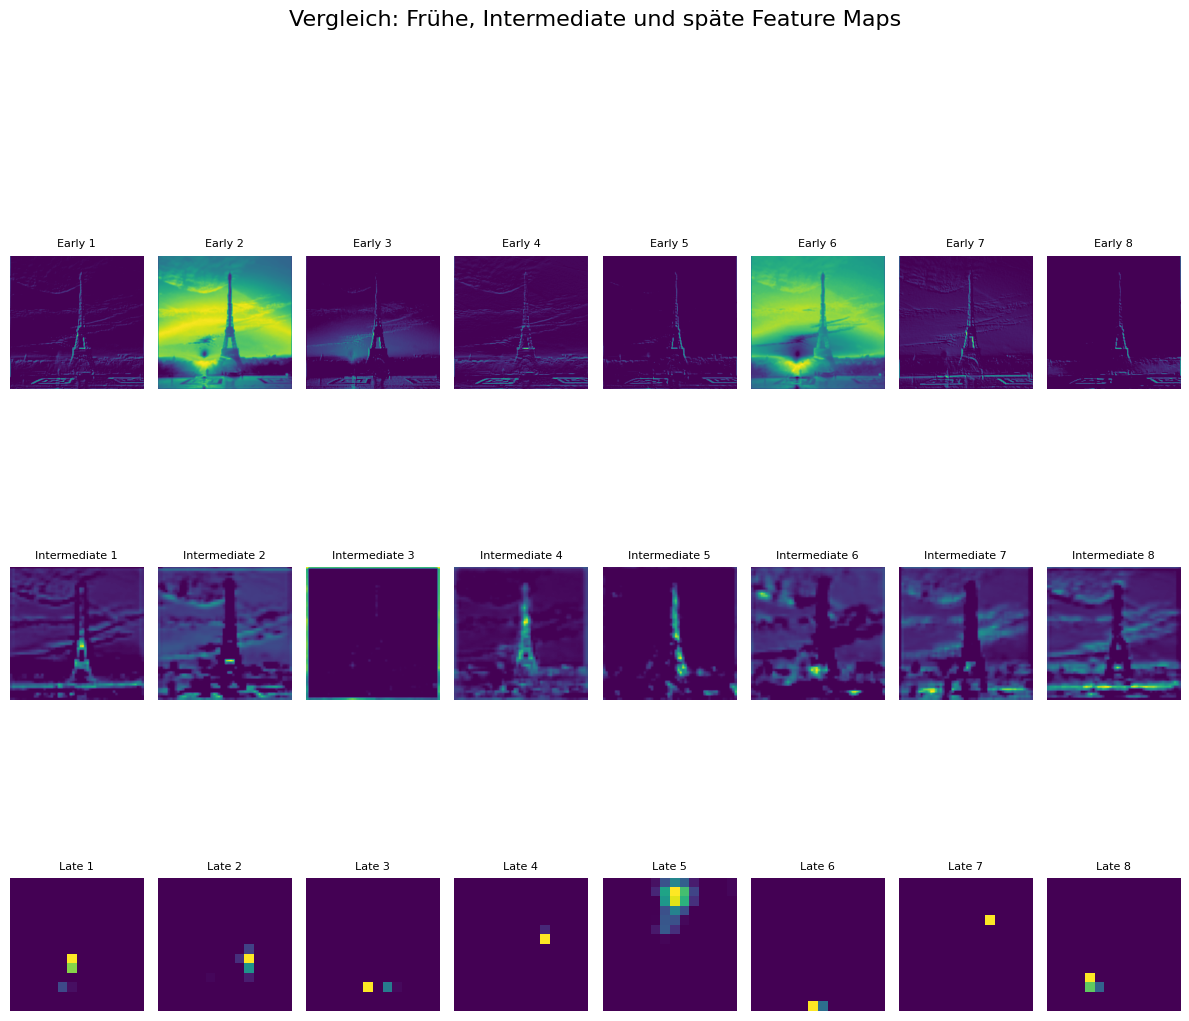

In [ ]:
import tensorflow as tf

# Vortrainiertes VGG16-Modell laden
vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False)

# Bild normalisieren und in das richtige Format bringen
image_resized = cv2.resize(image_cv_bgr, (224, 224))  # Bildgröße anpassen
input_image = np.expand_dims(image_resized, axis=0)  # Batch-Dimension hinzufügen
input_image = tf.keras.applications.vgg16.preprocess_input(input_image)  # Vorverarbeitung für VGG16

# Schichten auswählen
early_layer_name = 'block1_conv1'  # Frühe Schicht
intermediate_layer_name = 'block3_conv1'  # Intermediate Schicht
late_layer_name = 'block5_conv3'  # Späte Schicht

# Modelle für die gewählten Schichten erstellen
early_layer_model = tf.keras.Model(inputs=vgg16.input, outputs=vgg16.get_layer(early_layer_name).output)
intermediate_layer_model = tf.keras.Model(inputs=vgg16.input, outputs=vgg16.get_layer(intermediate_layer_name).output)
late_layer_model = tf.keras.Model(inputs=vgg16.input, outputs=vgg16.get_layer(late_layer_name).output)

# Feature Maps berechnen
early_feature_maps = early_layer_model.predict(input_image)
intermediate_feature_maps = intermediate_layer_model.predict(input_image)
late_feature_maps = late_layer_model.predict(input_image)

# Anzahl der Feature Maps in jeder Schicht
num_early_maps = early_feature_maps.shape[-1]
num_intermediate_maps = intermediate_feature_maps.shape[-1]
num_late_maps = late_feature_maps.shape[-1]

# Visualisierung: Maximal 8 Feature Maps pro Schicht
plt.figure(figsize=(12, 12))

# Frühe Feature Maps
for i in range(8):  # Zeige die ersten 8 Feature Maps
    plt.subplot(3, 8, i + 1)
    plt.imshow(early_feature_maps[0, :, :, i], cmap='viridis')
    plt.title(f"Early {i+1}", fontsize=8)
    plt.axis("off")

# Intermediate Feature Maps
for i in range(8):  # Zeige die ersten 8 Feature Maps
    plt.subplot(3, 8, i + 9)
    plt.imshow(intermediate_feature_maps[0, :, :, i], cmap='viridis')
    plt.title(f"Intermediate {i+1}", fontsize=8)
    plt.axis("off")

# Späte Feature Maps
for i in range(8):  # Zeige die ersten 8 Feature Maps
    plt.subplot(3, 8, i + 17)
    plt.imshow(late_feature_maps[0, :, :, i], cmap='viridis')
    plt.title(f"Late {i+1}", fontsize=8)
    plt.axis("off")

plt.suptitle("Vergleich: Frühe, Intermediate und späte Feature Maps", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()